<a href="https://colab.research.google.com/github/walter-lin/DeepModel/blob/main/train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#匯入資料方法1-連結Google雲端

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/PythonStu_CJCU/deeplearning') #切換到指定目錄
# os.chdir('/content/drive/My Drive/{你的google雲端硬碟資料夾位址}')

In [ ]:
os.listdir() #檢查目錄內容

In [ ]:
#資料來源：https://ithelp.ithome.com.tw/articles/10234373

#匯入資料方法2-透過共用連結下載

**透過檔案共用連結**

一般來說，Google Drive 的檔案連結會是類似下面的結構：

https://drive.google.com/open?id=1duQU7xqXRsOSPYeOR0zLiSA8g_LCFzoV

其中 "open?id=" 後面的那一串亂碼稱為 file_id

在 colab 中，我們可以直接用 file_id 下載檔案，優點是這個過程不需要再手動輸入任何訊息，但缺點是下載下來的檔案在程式執行完畢後就會消失，也就是每一次都必須重新下載，使得執行時間增加。

In [ ]:
#資料來源：https://colab.research.google.com/drive/1i41Whco5KIb7EuntKYwTVORAkAwCmlkF#scrollTo=XztYEj0oD7J3

In [ ]:
# 實際連結長這樣 https://drive.google.com/file/d/1LjZJ7BiroN4RN2RjULgYU_PmbjHw6nfc/view?usp=sharing
# 下載 file_id 為 "1LjZJ7BiroN4RN2RjULgYU_PmbjHw6nfc" 的檔案，並將它命名為 data.zip
!gdown --id '1LjZJ7BiroN4RN2RjULgYU_PmbjHw6nfc' --output data.zip

Downloading...
From: https://drive.google.com/uc?id=1LjZJ7BiroN4RN2RjULgYU_PmbjHw6nfc
To: /content/data.zip
7.48MB [00:00, 65.6MB/s]


#解壓縮檔案

In [ ]:
!unzip -qq -u data.zip #解壓縮(data)的zip檔案

##補充說明(勿直接執行!)

In [ ]:
#拿掉-qq
!unzip -u data.zip #安靜模式，不顯示結果訊息(-q)

unzip:  cannot find or open data.zip, data.zip.zip or data.zip.ZIP.


In [ ]:
#拿掉-u
!unzip -qq data.zip #系統會不斷詢問是否要取代檔案或新增目錄，一個檔案問一次，很囉唆

unzip:  cannot find or open data.zip, data.zip.zip or data.zip.ZIP.


In [ ]:
# 此指令為zip指令，與python或colab其實無關
# https://colab.research.google.com/drive/17OFNepLIA1cyBtbLRz-BuatafSsslBTt?authuser=1#scrollTo=55mDYcPrl9R2&line=2&uniqifier=1

#Train_Model

In [ ]:
# coding: utf-8
from dataset import load_data

In [ ]:
# Step 1. 資料準備

(x_train,y_train),(x_test,y_test) = load_data() #函式load_data需在同一目錄下

In [ ]:
# 訓練資料打亂排序>避免連續樣本單一，降低訓練準確度
import random

index = [i for i in range(len(x_train))]
random.shuffle(index)
x_train = x_train[index]
y_train = y_train[index]

In [ ]:
#測試資料可以不用打亂
# index = [i for i in range(len(x_test))]
# random.shuffle(index)
# x_test = x_test[index]
# y_test = y_test[index]


In [ ]:
# 正規化(將資料每筆資料的值改為0~1)
x_train_normalize = x_train.astype('float32') / 255.0
x_test_normalize = x_test.astype('float32') / 255.0

In [ ]:
from keras.utils import np_utils
y_train_OneHot = np_utils.to_categorical(y_train)
y_test_OneHot = np_utils.to_categorical(y_test)

print(y_train_OneHot.shape) #印出表格
print(y_test_OneHot.shape)
#(列，攔) 橫向>列，直向>攔

(21, 2)
(21, 2)


In [ ]:
# Step 2. 建立模型

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

In [ ]:
# 卷積層1與池化層1

model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32, 3), 
                 activation='relu', 
                 padding='same'))

model.add(Dropout(rate=0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))


In [ ]:
# 卷積層2與池化層2

model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))


In [ ]:
# Step 3. 建立神經網路(平坦層、隱藏層、輸出層)

model.add(Flatten())
model.add(Dropout(rate=0.25))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(2, activation='softmax'))

print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [ ]:
# 載入之前訓練的模型

try:
    model.load_weights("./cnn_model.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")


載入模型成功!繼續訓練模型


Epoch 1/12
1/1 [==============================] - 1s 634ms/step - loss: 0.0605 - acc: 1.0000 - val_loss: 0.9226 - val_acc: 0.4000
Epoch 2/12
1/1 [==============================] - 0s 35ms/step - loss: 0.0720 - acc: 1.0000 - val_loss: 1.6765 - val_acc: 0.4000
Epoch 3/12
1/1 [==============================] - 0s 32ms/step - loss: 0.0901 - acc: 0.9375 - val_loss: 1.2113 - val_acc: 0.4000
Epoch 4/12
1/1 [==============================] - 0s 33ms/step - loss: 0.0560 - acc: 1.0000 - val_loss: 0.7524 - val_acc: 0.6000
Epoch 5/12
1/1 [==============================] - 0s 31ms/step - loss: 0.0532 - acc: 1.0000 - val_loss: 0.8002 - val_acc: 0.6000
Epoch 6/12
1/1 [==============================] - 0s 42ms/step - loss: 0.0304 - acc: 1.0000 - val_loss: 1.1169 - val_acc: 0.4000
Epoch 7/12
1/1 [==============================] - 0s 34ms/step - loss: 0.0230 - acc: 1.0000 - val_loss: 1.4647 - val_acc: 0.4000
Epoch 8/12
1/1 [==============================] - 0s 36ms/step - loss: 0.0128 - acc: 1.0000 - va

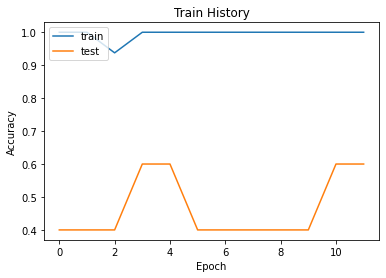

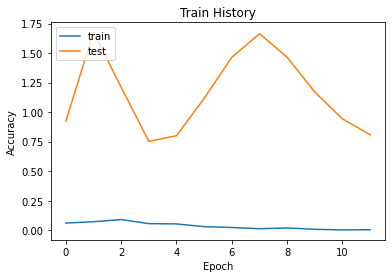

In [ ]:
# Step 4. 訓練模型

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['acc'])
train_history=model.fit(x_train_normalize, y_train_OneHot,
                        validation_split=0.2,
                        epochs=12, batch_size=16, verbose=1)          

import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc,num):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig(num,dpi=300)
    plt.show()

show_train_history('acc','val_acc','結果圖1.jpg')
show_train_history('loss','val_loss','結果圖2.jpg')


In [ ]:
# Step 6. 評估模型準確率

scores = model.evaluate(x_test_normalize,y_test_OneHot,verbose=0)
print(scores[:2])


[0.34713390469551086, 0.8571428656578064]


In [ ]:
# Step 7. 進行預測

prediction=model.predict_classes(x_test_normalize)
prediction[:2]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 1])

{0: 'banana', 1: 'jake the dog'}


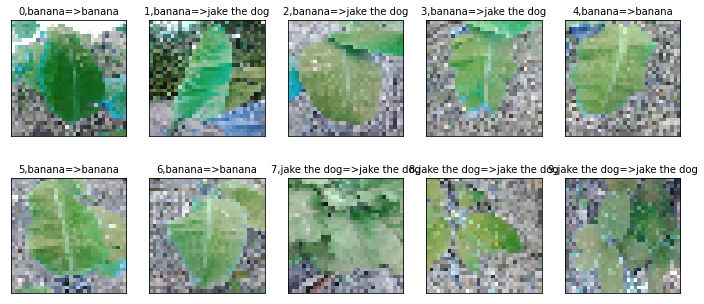

In [ ]:
# 查看預測結果

label_dict={0:'banana',1:"jake the dog"}

print(label_dict)		

def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

plot_images_labels_prediction(x_test_normalize,y_test,prediction,0,10)


In [ ]:
# Step 8. Save Weight to h5 

model.save_weights("cnn_model.h5")
print("Saved model to disk")


Saved model to disk
